In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


Text(0, 0.5, 'height')

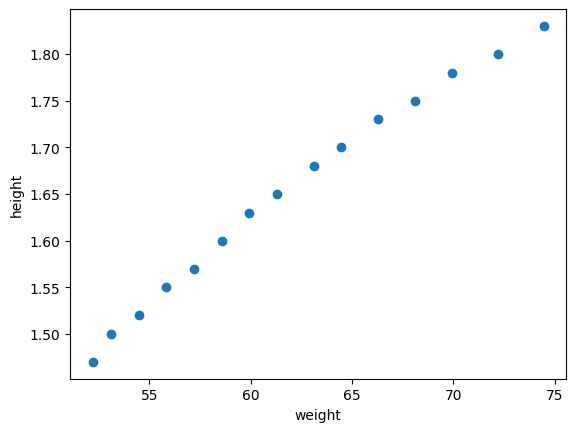

In [4]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

In [6]:
#correlation matrix
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


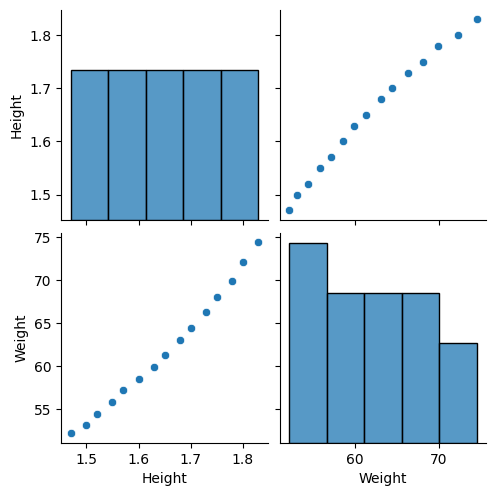

In [7]:
##seaborn
import seaborn as sns
sns.pairplot(df)

In [10]:
##Independant and Dependant Features
X=df[['Weight']]
y=df['Height']

In [11]:
print(X.shape)
print(y.shape)

(15, 1)
(15,)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
slope=regressor.coef_
print(slope)

[0.11836681]


In [16]:
intercept=regressor.intercept_
print(intercept)

1.6590909090909094


In [17]:
y_pred=regressor.predict(X_train)

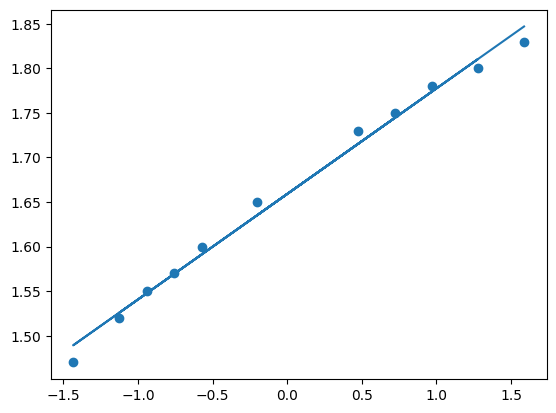

In [18]:
#plot for training data
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred)

In [19]:
y_pred_test=regressor.predict(X_test)

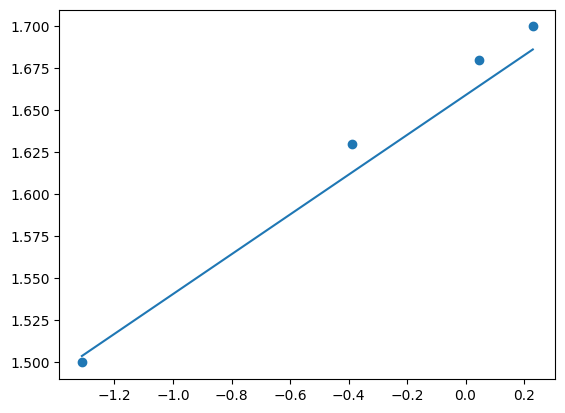

In [20]:
#plot for test data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test)

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_test)
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error(MSE):{mse}")
print(f"Root Mean Squared Error(RMSE):{rmse}")
print(f"r2 score(R2):{r2}")

Mean Absolute Error(MAE):0.012438076526499253
Mean Squared Error(MSE):0.00018038364799077757
Root Mean Squared Error(RMSE):0.013430697971095083
r2 score(R2):0.9702766388480696


In [23]:
new_pred=regressor.predict(scaler.transform([[74]]))
new_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.83951939])